<a href="https://colab.research.google.com/github/kavitabansal95/Wallet-Risk-Score-Prediction/blob/main/Risk_Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata, drive
import pandas as pd
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
wallet_id_df = pd.read_excel('/content/drive/MyDrive/Colab/Wallet id.xlsx')

In [3]:
wallet_id_df.isna().sum()

,0
wallet_id,0


In [4]:
wallet_id_df.duplicated().sum()

np.int64(0)

In [5]:
wallet_id_df.nunique()

,0
wallet_id,103


In [6]:
wallet_ids= wallet_id_df['wallet_id'].tolist()

In [7]:
# import pandas as pd
# from google.colab import userdata


# covalent_key=userdata.get('covalent_key')


# import requests
# import pandas as pd
# import time

# # Replace with your actual Covalent API key

# def fetch_compound_transactions(wallet_address):
#     url = f"https://api.covalenthq.com/v1/1/address/{wallet_address}/transactions_v2/"
#     params = {
#         "key": covalent_key,
#         "page-size": 10000
#     }
#     response = requests.get(url, params=params)

#     if response.status_code != 200:
#         print(f"Failed for wallet: {wallet_address}, status code: {response.status_code}")
#         return []

#     data = response.json()
#     txs = data.get("data", {}).get("items", [])
#     return txs

# # List of wallet IDs
# wallets = wallet_id_df['wallet_id'].dropna().tolist()

# # To store all transactions
# all_transactions = []

# # Loop through wallets
# for wallet in wallets:
#     print(f"Fetching transactions for wallet: {wallet}")
#     txs = fetch_compound_transactions(wallet)

#     # Add wallet info to each transaction
#     for tx in txs:
#         tx['wallet'] = wallet

#     all_transactions.extend(txs)

#     # To respect rate limits
#     time.sleep(0.5)  # Increase delay if needed

# # Create a DataFrame
# wallet_tx_df = pd.DataFrame(all_transactions)

# # Show results
# print(f"Total transactions fetched: {len(wallet_tx_df)}")
# wallet_tx_df.head()




In [8]:
# wallet_tx_df.to_csv('/content/drive/MyDrive/Colab/wallet_tx_df.csv')
wallet_tx_df_original= pd.read_csv('/content/drive/MyDrive/Colab/wallet_tx_df.csv')

In [9]:
wallet_tx_df=wallet_tx_df_original.copy()

In [10]:
wallet_tx_df.isnull().sum()

,0
Unnamed: 0,0
block_signed_at,0
block_height,0
block_hash,0
tx_hash,0
tx_offset,0
successful,0
miner_address,0
from_address,0
from_address_label,8668


In [11]:
wallet_tx_df.duplicated().sum()

np.int64(0)

In [12]:
wallet_tx_df.drop(columns=wallet_tx_df.columns[0], axis=1, inplace=True)

In [13]:
wallet_tx_df.drop(columns=['from_address_label','to_address_label' ,'miner_address', 'pretty_value_quote', 'pretty_gas_quote', 'gas_quote_rate','tx_offset','block_hash', 'gas_metadata','log_events'], axis=1, inplace=True)

In [14]:
wallet_tx_df.columns

Index(['block_signed_at', 'block_height', 'tx_hash', 'successful',
       'from_address', 'to_address', 'value', 'value_quote', 'gas_offered',
       'gas_spent', 'gas_price', 'fees_paid', 'gas_quote', 'wallet'],
      dtype='object')

In [15]:
wallet_tx_cleaned=wallet_tx_df.copy()

In [16]:
wallet_tx_cleaned.to_excel('/content/drive/MyDrive/Colab/wallet_tx_cleaned.xlsx')
wallet_tx_cleaned= pd.read_excel('/content/drive/MyDrive/Colab/wallet_tx_cleaned.xlsx')

In [17]:
wallet_tx_cleaned.columns

Index(['Unnamed: 0', 'block_signed_at', 'block_height', 'tx_hash',
       'successful', 'from_address', 'to_address', 'value', 'value_quote',
       'gas_offered', 'gas_spent', 'gas_price', 'fees_paid', 'gas_quote',
       'wallet'],
      dtype='object')

In [18]:
wallet_tx_cleaned.drop(columns=wallet_tx_cleaned.columns[0], axis=1, inplace=True)
for column in wallet_tx_cleaned.columns:
  print(f'{column} : {wallet_tx_cleaned[column].nunique()}')

block_signed_at : 8258
block_height : 8258
tx_hash : 8638
successful : 2
from_address : 1820
to_address : 2022
value : 1228
value_quote : 2101
gas_offered : 4204
gas_spent : 4927
gas_price : 3230
fees_paid : 7466
gas_quote : 8267
wallet : 103


In [19]:
wallet_tx_cleaned.isna().sum()

,0
block_signed_at,0
block_height,0
tx_hash,0
successful,0
from_address,0
to_address,118
value,0
value_quote,0
gas_offered,0
gas_spent,0


In [20]:
wallet_tx_cleaned['to_address'].fillna(0, inplace=True)

/tmp/ipython-input-20-3834192707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_tx_cleaned['to_address'].fillna(0, inplace=True)


In [21]:
# 1. Add a 'direction' column to tag sent vs received
wallet_tx_cleaned["direction"] = wallet_tx_cleaned.apply(
    lambda row: "sent" if row["from_address"] == row["wallet"]
    else ("contract_creation" if row["to_address"] == 0
          else "received"),
    axis=1
)

wallet_tx_cleaned["direction"].value_counts()

,count
direction,
sent,5572
received,3047
contract_creation,49


In [22]:
import pandas as pd
from datetime import datetime



# 2. Group by wallet and aggregate features
wallet_features = (
    wallet_tx_cleaned.groupby("wallet").agg(
        tx_count=("tx_hash", "count"),
        success_count=("successful", lambda x: (x == True).sum()),
        failure_count=("successful", lambda x: (x == False).sum()),
        unique_to_addresses=("to_address", pd.Series.nunique),
        unique_from_addresses=("from_address", pd.Series.nunique),
        avg_tx_value_eth=("value", lambda x: pd.to_numeric(x, errors='coerce').mean()),
        total_eth_sent=("value", lambda x: pd.to_numeric(x, errors='coerce').sum() / 1e18),
        avg_gas_spent=("gas_spent", "mean"),
        avg_fees_paid=("fees_paid", "mean"),
        gas_price_avg=("gas_price", "mean"),
        gas_quote_avg=("gas_quote", "mean"),
        contract_interactions=("to_address", lambda x: sum(
            isinstance(addr, str) and addr.startswith("0x") and len(addr) == 42 for addr in x)),
        first_tx_date=("block_signed_at", "min"),
        last_tx_date=("block_signed_at", "max"),
        gas_offered_avg=("gas_offered", "mean"),
        value_quote_avg=("value_quote", "mean"),
        received_tx_count=("direction", lambda x: (x == "received").sum()),
        sent_tx_count=("direction", lambda x: (x == "sent").sum()),
        contract_creation_sum=("direction", lambda x: (x == "contract_creation").sum())
    ).reset_index()
)

# 3. Derived features

# Convert dates to datetime
wallet_features["first_tx_date"] = pd.to_datetime(wallet_features["first_tx_date"])
wallet_features["last_tx_date"] = pd.to_datetime(wallet_features["last_tx_date"])

# Wallet age in days
wallet_features["wallet_age_days"] = (
    wallet_features["last_tx_date"] - wallet_features["first_tx_date"]
).dt.days

# Avoid division by zero
wallet_features["success_rate"] = wallet_features["success_count"] / wallet_features["tx_count"]
wallet_features["failure_rate"] = wallet_features["failure_count"] / wallet_features["tx_count"]

wallet_features["in_out_ratio"] = wallet_features.apply(
    lambda row: row["sent_tx_count"] / row["received_tx_count"]
    if row["received_tx_count"] > 0 else None,
    axis=1
)

wallet_features["avg_tx_per_day"] = wallet_features.apply(
    lambda row: row["tx_count"] / row["wallet_age_days"]
    if row["wallet_age_days"] > 0 else None,
    axis=1
)

wallet_features["eth_per_tx"] = wallet_features.apply(
    lambda row: row["total_eth_sent"] / row["sent_tx_count"]
    if row["sent_tx_count"] > 0 else None,
    axis=1
)

['total_eth_sent', 'gas_offered_avg', 'value_quote_avg', 'eth_per_tx']

['total_eth_sent', 'gas_offered_avg', 'value_quote_avg', 'eth_per_tx']

In [23]:
wallet_features["last_tx_date"] = pd.to_datetime(wallet_features["last_tx_date"]).dt.tz_localize(None)

max_date = wallet_features["last_tx_date"].max()

wallet_features["days_since_last_tx"] = (max_date - wallet_features["last_tx_date"]).dt.days
wallet_features["days_since_last_tx"].value_counts()

,count
days_since_last_tx,
1717,4
86,4
1710,3
1705,3
175,3
...,...
44,1
1948,1
1677,1


In [24]:
wallet_features.drop(['first_tx_date','last_tx_date' ],axis=1 , inplace=True)

In [25]:
wallet_features.columns

Index(['wallet', 'tx_count', 'success_count', 'failure_count',
       'unique_to_addresses', 'unique_from_addresses', 'avg_tx_value_eth',
       'total_eth_sent', 'avg_gas_spent', 'avg_fees_paid', 'gas_price_avg',
       'gas_quote_avg', 'contract_interactions', 'gas_offered_avg',
       'value_quote_avg', 'received_tx_count', 'sent_tx_count',
       'contract_creation_sum', 'wallet_age_days', 'success_rate',
       'failure_rate', 'in_out_ratio', 'avg_tx_per_day', 'eth_per_tx',
       'days_since_last_tx'],
      dtype='object')

In [26]:
for col in wallet_features.columns:
  print(f'{col} : {wallet_features[col].nunique()}')

wallet : 103
tx_count : 43
success_count : 40
failure_count : 13
unique_to_addresses : 34
unique_from_addresses : 27
avg_tx_value_eth : 86
total_eth_sent : 84
avg_gas_spent : 85
avg_fees_paid : 103
gas_price_avg : 101
gas_quote_avg : 103
contract_interactions : 42
gas_offered_avg : 70
value_quote_avg : 100
received_tx_count : 31
sent_tx_count : 38
contract_creation_sum : 8
wallet_age_days : 70
success_rate : 24
failure_rate : 24
in_out_ratio : 43
avg_tx_per_day : 73
eth_per_tx : 79
days_since_last_tx : 80


In [27]:
wallet_features.to_excel('/content/drive/MyDrive/Colab/wallet_features.xlsx')
wallet_features= pd.read_excel('/content/drive/MyDrive/Colab/wallet_features.xlsx')

In [28]:
wallet_features.isnull().sum()

,0
Unnamed: 0,0
wallet,0
tx_count,0
success_count,0
failure_count,0
unique_to_addresses,0
unique_from_addresses,0
avg_tx_value_eth,0
total_eth_sent,0
avg_gas_spent,0


In [29]:
# row["total_eth_sent"] / row["sent_tx_count"]

wallet_features[wallet_features['eth_per_tx'].isnull()]


,Unnamed: 0,wallet,tx_count,success_count,failure_count,unique_to_addresses,unique_from_addresses,avg_tx_value_eth,total_eth_sent,avg_gas_spent,...,received_tx_count,sent_tx_count,contract_creation_sum,wallet_age_days,success_rate,failure_rate,in_out_ratio,avg_tx_per_day,eth_per_tx,days_since_last_tx
9,9,0x1656f1886c5ab634ac19568cd571bc72f385fdf7,133,130,3,8,2,1.954887e+17,7.553256,2.947645e+05,...,133,0,0,1501,0.977444,0.022556,0.0,0.088608,NaN,113
15,15,0x22d7510588d90ed5a87e0f838391aaafa707c34b,76,76,0,18,19,8.143007e+15,0.618869,6.897191e+05,...,71,0,5,1780,1.000000,0.000000,0.0,0.042697,NaN,86
35,35,0x54e19653be9d4143b08994906be0e27555e8834d,7,7,0,2,2,0.000000e+00,0.000000,1.254887e+05,...,7,0,0,0,1.000000,0.000000,0.0,NaN,NaN,2194
51,51,0x7851bdfb64bbecfb40c030d722a1f147dff5db6a,9,9,0,5,3,1.111111e+18,10.000000,1.201352e+06,...,8,0,1,1748,1.000000,0.000000,0.0,0.005149,NaN,111
73,73,0x9e6ec4e98793970a1307262ba68d37594e58cd78,47,47,0,5,1,0.000000e+00,0.000000,6.420998e+05,...,47,0,0,49,1.000000,0.000000,0.0,0.959184,NaN,1792
74,74,0xa7e94d933eb0c439dda357f61244a485246e97b8,4,4,0,3,2,1.100000e+17,0.440000,1.381841e+06,...,4,0,0,2033,1.000000,0.000000,0.0,0.001968,NaN,86
98,98,0xf60304b534f74977e159b2e159e135475c245526,18,18,0,5,14,0.000000e+00,0.000000,4.968093e+05,...,18,0,0,44,1.000000,0.000000,0.0,0.409091,NaN,1948
101,101,0xf80a8b9cfff0febf49914c269fb8aead4a22f847,13,11,2,7,7,3.084645e+16,0.401004,5.406861e+05,...,12,0,1,1599,0.846154,0.153846,0.0,0.008130,NaN,219


In [30]:
#row["tx_count"] / row["wallet_age_days"]

wallet_features[wallet_features['avg_tx_per_day'].isnull()]
wallet_features.fillna(0, inplace=True)

In [31]:
wallet_features.isnull().sum()

,0
Unnamed: 0,0
wallet,0
tx_count,0
success_count,0
failure_count,0
unique_to_addresses,0
unique_from_addresses,0
avg_tx_value_eth,0
total_eth_sent,0
avg_gas_spent,0


In [32]:
import numpy as np

wallet_features.isin([np.inf, -np.inf]).sum()

,0
Unnamed: 0,0
wallet,0
tx_count,0
success_count,0
failure_count,0
unique_to_addresses,0
unique_from_addresses,0
avg_tx_value_eth,0
total_eth_sent,0
avg_gas_spent,0


In [33]:
wallet_features.drop(wallet_features.columns[0], axis=1 , inplace=True)

In [34]:
wallet_features.head(5)

,wallet,tx_count,success_count,failure_count,unique_to_addresses,unique_from_addresses,avg_tx_value_eth,total_eth_sent,avg_gas_spent,avg_fees_paid,...,received_tx_count,sent_tx_count,contract_creation_sum,wallet_age_days,success_rate,failure_rate,in_out_ratio,avg_tx_per_day,eth_per_tx,days_since_last_tx
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,2404,2354,50,595,365,4.223275e+18,10152.754251,5.896269e+05,1.664127e+16,...,576,1817,11,2972,0.979201,0.020799,3.154514,0.808883,5.587647,35
1,0x06b51c6882b27cb05e712185531c1f74996dd988,5,5,0,4,3,4.860370e+15,0.024302,6.174640e+04,3.111930e+15,...,2,3,0,0,1.000000,0.000000,1.500000,0.000000,0.008101,1740
2,0x0795732aacc448030ef374374eaae57d2965c16c,4,4,0,3,3,4.650000e+15,0.018600,7.269825e+04,3.945244e+15,...,2,2,0,0,1.000000,0.000000,1.000000,0.000000,0.009300,1699
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,80,80,0,56,51,2.523044e+18,201.843495,1.653503e+06,2.157378e+16,...,58,21,1,2067,1.000000,0.000000,0.362069,0.038703,9.611595,118
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,5,5,0,4,3,5.200938e+15,0.026005,6.174400e+04,2.881103e+15,...,2,3,0,63,1.000000,0.000000,1.500000,0.079365,0.008668,1670


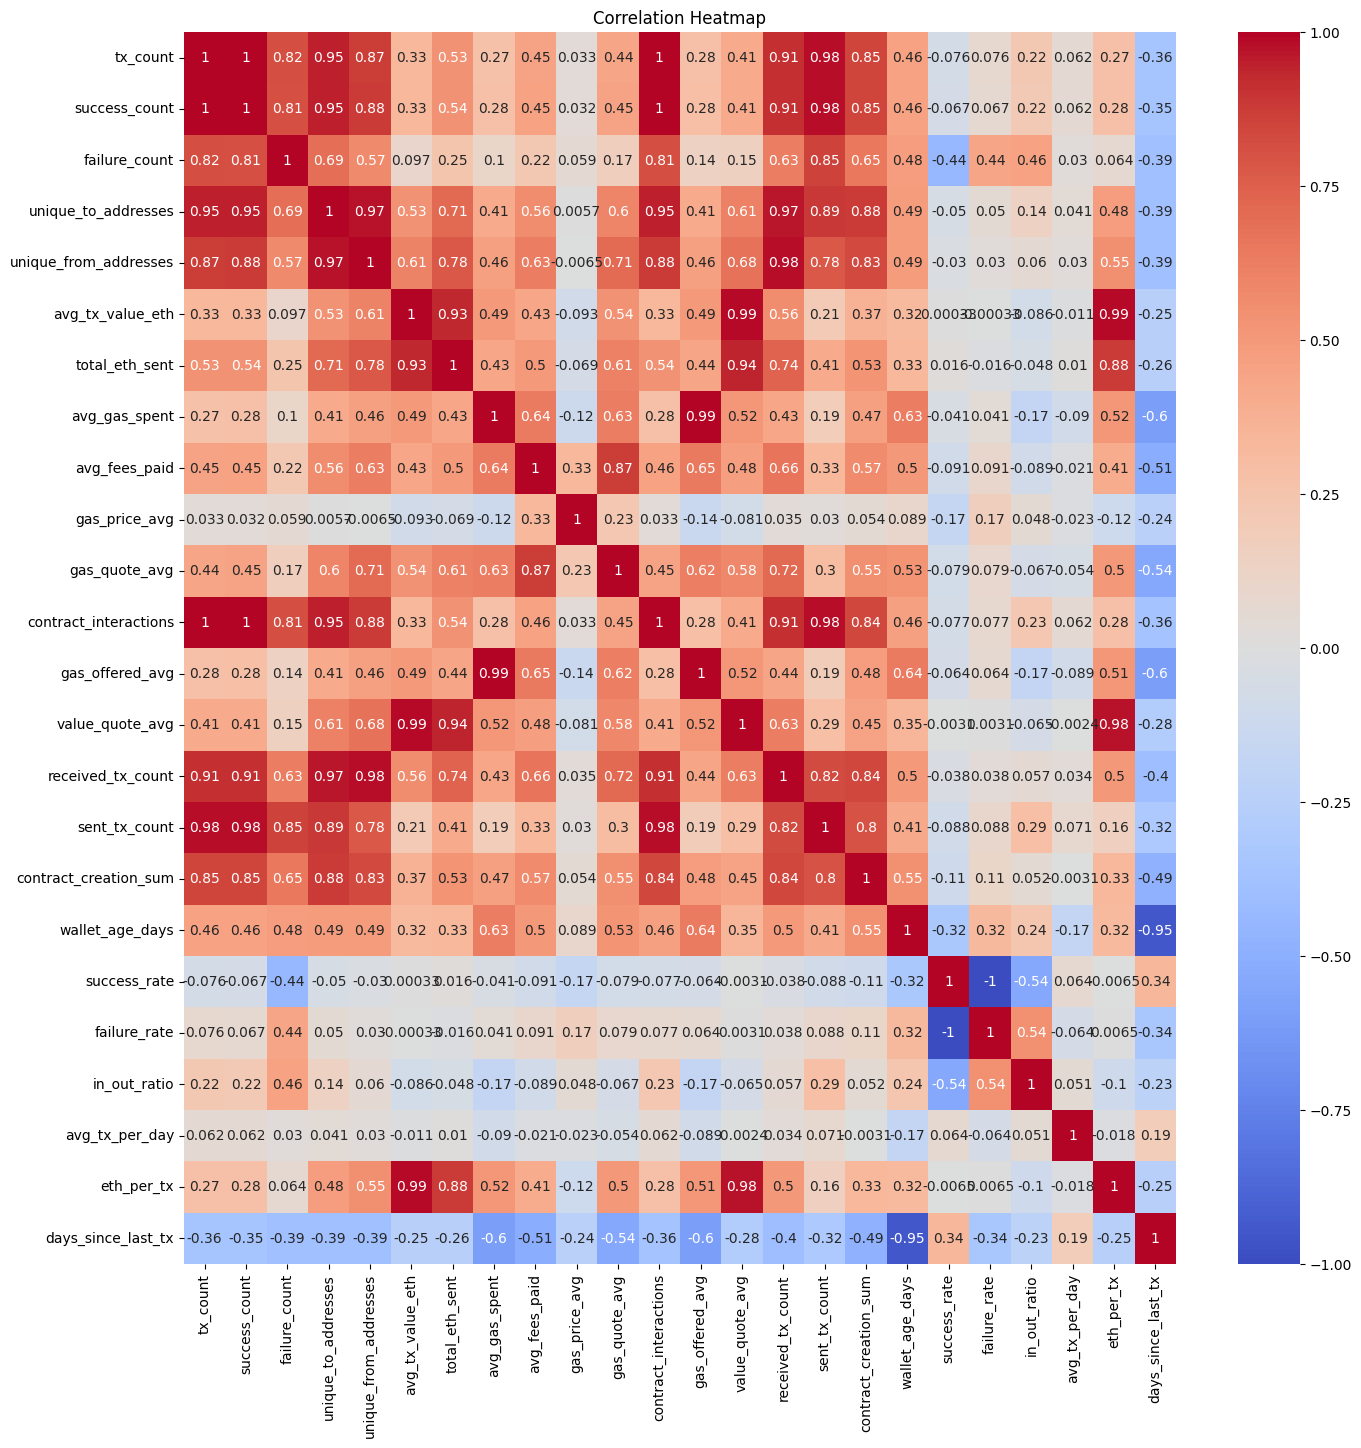

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = wallet_features.iloc[:, 1:].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
def identify_correlated_feat(df):
    correlation_matrix = df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
    return highly_correlated_features


highly_correlated_features=identify_correlated_feat(wallet_features.iloc[:,1:])
print(highly_correlated_features)

['success_count', 'unique_to_addresses', 'unique_from_addresses', 'total_eth_sent', 'contract_interactions', 'gas_offered_avg', 'value_quote_avg', 'received_tx_count', 'sent_tx_count', 'failure_rate', 'eth_per_tx', 'days_since_last_tx']


In [37]:

features_to_drop=['success_count','eth_per_tx', 'value_quote_avg','gas_offered_avg','unique_to_addresses','contract_interactions','failure_rate','received_tx_count','sent_tx_count','days_since_last_tx','total_eth_sent']

wallet_features.drop(features_to_drop, axis=1, inplace=True)

In [38]:
highly_correlated_features=identify_correlated_feat(wallet_features.iloc[:,1:])
print(highly_correlated_features)

[]


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaled_wallet_features =wallet_features.copy()
scaler = MinMaxScaler()
scaled_wallet_features.iloc[:, 1:] = scaler.fit_transform(scaled_wallet_features.iloc[:, 1:])

/tmp/ipython-input-39-1746322846.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.00000000e+00 8.32986256e-04 4.16493128e-04 3.20699708e-02
 8.32986256e-04 1.24947938e-03 1.24947938e-03 1.66597251e-03
 4.16493128e-04 5.41441066e-02 1.24947938e-03 1.16618076e-02
 8.32986256e-04 4.91461891e-02 0.00000000e+00 3.04039983e-02
 7.91336943e-03 1.66597251e-03 8.32986256e-04 4.16493128e-04
 8.32986256e-04 5.12286547e-02 5.37276135e-02 4.16493128e-04
 4.16493128e-04 8.32986256e-04 8.37151187e-02 9.66264057e-02
 7.08038317e-03 4.16493128e-04 1.09121200e-01 8.32986256e-04
 8.32986256e-04 1.24947938e-03 1.66597251e-02 1.66597251e-03
 8.32986256e-04 2.08246564e-03 3.33194502e-03 8.32986256e-04
 2.16576426e-02 4.16493128e-04 4.95626822e-02 2.79050396e-02
 4.99791753e-03 8.32986256e-04 5.41441066e-03 8.32986256e-04
 2.47396918e-01 4.16493128e-04 4.16493128e-04 2.49895877e-03
 3.33194502e-03 1.66597251e-03 4.16493128e-04 4.16

In [40]:
from sklearn.cluster import KMeans

X=scaled_wallet_features.iloc[:,1:]
clusters = range(2,15)
silhouette_scores = []
labels=[]

from sklearn.metrics import silhouette_samples, silhouette_score


for n_clusters in clusters:
    k_means = KMeans(n_clusters = n_clusters, random_state=42)
    k_means.fit(X)
    label = k_means.labels_
    labels.append(label)
    ss = silhouette_score(X,label)
    silhouette_scores.append(ss)
    print('silhouette score for k value ',n_clusters ,'is : ' ,ss)

best_k = clusters[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f'\nBest k value: {best_k}')
print(f'Best silhouette score: {best_silhouette_score}')




silhouette score for k value  2 is :  0.5860807521017909
silhouette score for k value  3 is :  0.41701527326109217
silhouette score for k value  4 is :  0.43447134115327
silhouette score for k value  5 is :  0.42787493290416667
silhouette score for k value  6 is :  0.4373058139859839
silhouette score for k value  7 is :  0.38806050205145853
silhouette score for k value  8 is :  0.38307352507660236
silhouette score for k value  9 is :  0.3874808981240912
silhouette score for k value  10 is :  0.32683103109613093
silhouette score for k value  11 is :  0.3604544330907853
silhouette score for k value  12 is :  0.3620864970611026
silhouette score for k value  13 is :  0.36695852691753517
silhouette score for k value  14 is :  0.3648079175555396

Best k value: 2
Best silhouette score: 0.5860807521017909


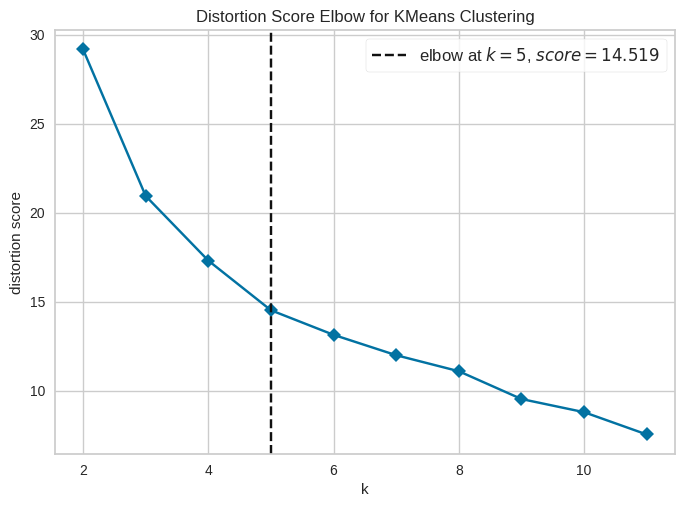

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# KElbowVisualizer is a visual diagnostic tool from the Yellowbrick library that helps you determine the optimal number of clusters (k) for clustering
# algorithms like KMeans, MiniBatchKMeans, etc. Below are Supported Metrics:
#'distortion': Sum of squared distances (default for KMeans)
#'silhouette': Average silhouette coefficient (separation of clusters)
#'calinski_harabasz': Ratio of between-cluster to within-cluster variance


# Instantiate KMeans model
model = KMeans(random_state=42)

# Visualizer with k from 2 to 12, using dsilhouette score
visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion', timings=False)

# Fit the model and plot the elbow
visualizer.fit(X)
visualizer.show()

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import plotly.express as px

# Step 0: Define non-numeric and numeric columns
non_numeric_cols = ['wallet']
numeric_cols = [col for col in wallet_features.columns if col not in non_numeric_cols]


# Step 1: KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
wallet_features['cluster'] = labels


# Step 2: t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

# Step 3: Merge t-SNE and cluster info into original dataframe
X['tsne-1'] = tsne_result[:, 0]
X['tsne-2'] = tsne_result[:, 1]
X['cluster'] = labels
X['wallet'] = wallet_features['wallet']

# Step 4: Plotting clusters


fig = px.scatter(X, x='tsne-1', y='tsne-2',
                 color=X['cluster'].astype(str),
                 hover_data=['wallet'],
                 title="Interactive Cluster View (t-SNE + KMeans)")
fig.show()


In [43]:
wallet_features['cluster'].value_counts()

,count
cluster,
2,63
0,17
4,13
3,6
1,4


In [44]:
cluster_profiles = wallet_features.groupby('cluster').mean(numeric_only=True)
cluster_profiles

,tx_count,failure_count,unique_from_addresses,avg_tx_value_eth,avg_gas_spent,avg_fees_paid,gas_price_avg,gas_quote_avg,contract_creation_sum,wallet_age_days,success_rate,in_out_ratio,avg_tx_per_day
cluster,,,,,,,,,,,,,
0,46.000000,1.352941,11.588235,1.454579e+17,2.966244e+05,9.641581e+15,9.440533e+10,15.593847,0.647059,1201.588235,0.980882,1.079109,0.059137
1,1157.750000,16.500000,302.750000,1.979845e+19,1.246048e+06,2.588407e+16,4.395315e+10,60.832948,6.250000,2419.250000,0.989425,1.529811,0.455536
2,8.936508,0.047619,3.952381,3.319450e+16,1.010275e+05,2.912757e+15,3.941174e+10,1.797632,0.000000,104.000000,0.999038,1.256016,0.427713
3,34.166667,0.500000,21.000000,3.054520e+18,1.554147e+06,9.006662e+15,1.799213e+10,18.810922,1.000000,2024.000000,0.992857,0.555279,0.015760
4,191.307692,8.923077,22.461538,2.027178e+17,2.395253e+05,5.566917e+15,4.449413e+10,7.493026,0.538462,1871.230769,0.931210,4.350969,0.190624


**Cluster 2 (Minimal Risk)**: Lowest risk. Very low transaction volume (tx_count: 8.94), minimal failures (failure_count: 0.05), and near-perfect success rate (0.999). Likely inactive or new wallets.


**Cluster 0 (Low Risk)**: Low risk. Moderate transactions (tx_count: 46), low failures (1.35), high success rate (0.981), and low activity (avg_tx_per_day: 0.059). Stable, low-frequency wallets.


**Cluster 3 (Moderate Risk)**: Moderate risk. Low-moderate transactions (tx_count: 34.17), high transaction values (avg_tx_value_eth: 3.05e+18), and inbound-heavy (in_out_ratio: 0.56). Possible holding or high-value transfer wallets.


**Cluster 4 (Elevated Risk)**: Elevated risk. High transactions (tx_count: 191.31), moderate failures (8.92), lower success rate (0.931), and outbound-heavy (in_out_ratio: 4.35). Potential speculative or scam-related activity.


**Cluster 1 (High Risk)**: Highest risk. Very high transactions (tx_count: 1157.75), high failures (16.5), many unique addresses (302.75), and extremely high transaction values (1.98e+19). Likely bots, whales, or illicit activity.

In [45]:
cluster_mapping = {
   2:0,
   0:1,
   3:2,
   4:3,
   1:4
}

wallet_features["cluster"] = wallet_features["cluster"].map(cluster_mapping)

In [46]:

non_numeric_cols=['wallet']

numeric_cols = [col for col in wallet_features.columns if col not in non_numeric_cols]

scaler = MinMaxScaler()

normalized_pca = scaler.fit_transform(wallet_features[numeric_cols])
normalized_pca = pd.DataFrame(normalized_pca, columns=numeric_cols)
normalized_pca.head(5)

,tx_count,failure_count,unique_from_addresses,avg_tx_value_eth,avg_gas_spent,avg_fees_paid,gas_price_avg,gas_quote_avg,contract_creation_sum,wallet_age_days,success_rate,in_out_ratio,avg_tx_per_day,cluster
0,1.000000,1.0,1.000000,0.078017,0.279529,0.408461,0.387867,0.162795,1.000000,1.000000,0.942804,0.398465,0.115555,1.0
1,0.000833,0.0,0.005495,0.000090,0.011158,0.068370,0.368308,0.009438,0.000000,0.000000,1.000000,0.189474,0.000000,0.0
2,0.000416,0.0,0.005495,0.000086,0.016726,0.089317,0.408783,0.019321,0.000000,0.000000,1.000000,0.126316,0.000000,0.0
3,0.032070,0.0,0.137363,0.046609,0.820398,0.532451,0.277286,0.368837,0.090909,0.695491,1.000000,0.045735,0.005529,0.5
4,0.000833,0.0,0.005495,0.000096,0.011157,0.062568,0.363621,0.009940,0.000000,0.021198,1.000000,0.189474,0.011338,0.0


In [47]:
normalized_pca.columns

Index(['tx_count', 'failure_count', 'unique_from_addresses',
       'avg_tx_value_eth', 'avg_gas_spent', 'avg_fees_paid', 'gas_price_avg',
       'gas_quote_avg', 'contract_creation_sum', 'wallet_age_days',
       'success_rate', 'in_out_ratio', 'avg_tx_per_day', 'cluster'],
      dtype='object')

In [48]:
weights = np.array([0.15, 0.12, 0.15, 0.12, 0.08, 0.06, 0.05, 0.04, 0.10, 0.08, 0.10, 0.10, 0.05, 0.00])

columns = normalized_pca.columns

wallet_features['wallet_risk_score'] = (
    normalized_pca[columns] * weights
).sum(axis=1)


scaler = MinMaxScaler(feature_range=(0, 1000))
wallet_features['wallet_risk_score'] = scaler.fit_transform(wallet_features[['wallet_risk_score']]).round(2).astype(int)


In [49]:
wallet_features.head(5)

,wallet,tx_count,failure_count,unique_from_addresses,avg_tx_value_eth,avg_gas_spent,avg_fees_paid,gas_price_avg,gas_quote_avg,contract_creation_sum,wallet_age_days,success_rate,in_out_ratio,avg_tx_per_day,cluster,wallet_risk_score
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,2404,50,365,4.223275e+18,5.896269e+05,1.664127e+16,5.555451e+10,18.222934,11,2972,0.979201,3.154514,0.808883,4,1000
1,0x06b51c6882b27cb05e712185531c1f74996dd988,5,0,3,4.860370e+15,6.174640e+04,3.111930e+15,5.280000e+10,1.138223,0,0,1.000000,1.500000,0.000000,0,53
2,0x0795732aacc448030ef374374eaae57d2965c16c,4,0,3,4.650000e+15,7.269825e+04,3.945244e+15,5.850000e+10,2.239264,0,0,1.000000,1.000000,0.000000,0,50
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,80,0,51,2.523044e+18,1.653503e+06,2.157378e+16,3.998171e+10,41.176860,1,2067,1.000000,0.362069,0.038703,2,309
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,5,0,3,5.200938e+15,6.174400e+04,2.881103e+15,5.214000e+10,1.194177,0,63,1.000000,1.500000,0.079365,0,56


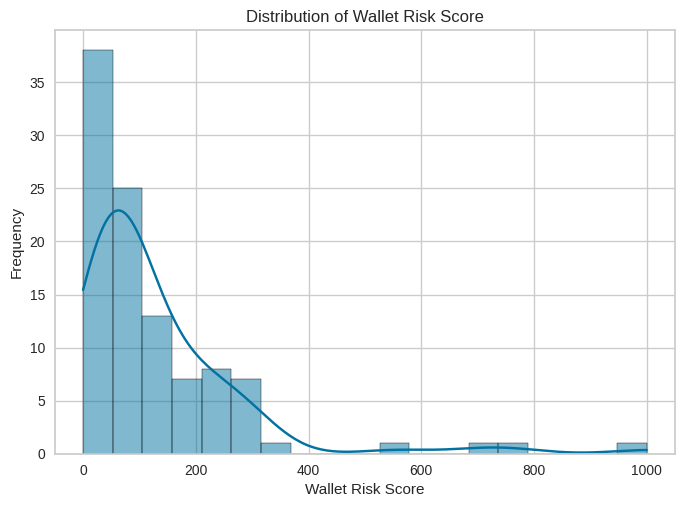

In [50]:
sns.histplot(wallet_features['wallet_risk_score'], kde=True)
plt.title('Distribution of Wallet Risk Score')
plt.xlabel('Wallet Risk Score')
plt.ylabel('Frequency')
plt.show()